# Data Exploration

In [1]:
!pip install dask["complete"]
!pip install dask distributed --upgrade

    100% |████████████████████████████████| 32.4MB 250kB/s ta 0:00:01    37% |████████████                    | 12.1MB 263kB/s eta 0:01:18
    100% |████████████████████████████████| 71kB 344kB/s ta 0:00:011
  Running setup.py bdist_wheel for bokeh ... done
  Stored in directory: /igz/.cache/pip/wheels/fb/f8/47/09700d9a19cbcbf0b7a3130690b75c0d6ff80fbda0b1774c7c
Successfully built bokeh
  Found existing installation: bokeh 0.13.0
    Uninstalling bokeh-0.13.0:
      Successfully uninstalled bokeh-0.13.0
Requirement already up-to-date: dask in /User/.pythonlibs/jupyter-notebook/lib/python3.6/site-packages (2.9.1)
Requirement already up-to-date: distributed in /User/.pythonlibs/jupyter-notebook/lib/python3.6/site-packages (2.9.1)


In [2]:
!pip install 'bokeh==0.13.0'
# restart the notebook for the packages to be updated 

  Found existing installation: bokeh 1.4.0
    Uninstalling bokeh-1.4.0:
      Successfully uninstalled bokeh-1.4.0


In [3]:
import os
import sys
sys.path.append('../../')
# Dataframes
import v3io_frames_local as v3f
import dask.dataframe as dd
from dask.distributed import Client, progress
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt; plt.rcdefaults()
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import column, row, gridplot
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral11
import seaborn as sns; sns.set()


output_notebook()
%matplotlib inline

Loading BokehJS ...

## Explore data
Access the time-series and run a queries to learn about the data

In [4]:
client = v3f.Client('framesd:8081')
client.read(backend='tsdb', query='select sum(throughput) from netops_metrics_jupyter',
            start="now-2d", end='now+1d', multi_index=True)

sum(throughput)
time                company        data_center    device                        
2020-01-08 18:41:01 Roberts_PLC    John_Curve     7873407333830    161022.988730
                    Douglas-Holmes Paul_Lane      1483265418393    165065.370898
                                                  3232046314748    156607.934370
                                   Lopez_Summit   4752014671680    155971.293211
                    Roberts_PLC    John_Curve     7026488238274    149733.542606
                                   Gregory_Tunnel 3565281248497    168260.228280
                    Douglas-Holmes Lopez_Summit   7236123187473    159599.667796
                    Roberts_PLC    Gregory_Tunnel 4401357069985    171069.373180

In [5]:
# read the devices table 
devicedf = client.read(backend='kv', table='netops_devices')
devicedf.head()

,company,data_center
device,,
4752014671680,Douglas-Holmes,Lopez_Summit
7236123187473,Douglas-Holmes,Lopez_Summit
4401357069985,Roberts_PLC,Gregory_Tunnel
3232046314748,Douglas-Holmes,Paul_Lane
3565281248497,Roberts_PLC,Gregory_Tunnel


## Sample device
Select a single device and explore its parameters

In [6]:
# use the first device ID for exploration
first_device = devicedf.index.values[0]
query = "select * from netops_metrics_jupyter where device='{}'".format(first_device)
sample_device = client.read(backend='tsdb', query=query, start="now-2d", end='now+1d', multi_index=True)
sample_device.head()

,,,,packet_loss_is_error,cpu_utilization,cpu_utilization_is_error,throughput,throughput_is_error,latency,latency_is_error,is_error,packet_loss
time,company,data_center,device,,,,,,,,,
2020-01-10 18:30:34.637,Douglas-Holmes,Lopez_Summit,4752014671680,0.0,86.381861,0.0,261.468386,0.0,10.498757,0.0,0.0,0.00000
2020-01-10 18:30:39.637,Douglas-Holmes,Lopez_Summit,4752014671680,0.0,68.033947,0.0,280.829341,0.0,0.000000,0.0,0.0,0.00000
2020-01-10 18:30:44.637,Douglas-Holmes,Lopez_Summit,4752014671680,0.0,59.185050,0.0,244.715853,0.0,0.472216,0.0,0.0,0.00000
2020-01-10 18:30:49.637,Douglas-Holmes,Lopez_Summit,4752014671680,0.0,67.071966,0.0,291.624977,0.0,3.152973,0.0,0.0,1.43764
2020-01-10 18:30:54.637,Douglas-Holmes,Lopez_Summit,4752014671680,0.0,69.894528,0.0,272.122118,0.0,0.000000,0.0,0.0,0.00000


Reading as CSV file and processing in parallel with Dask

### Examine Metrics

In [7]:
sample_component_performance = sample_device['cpu_utilization'] 
p = figure(title="Sample Performance Generation [ CPU Utilization ]",
            x_axis_label="ticks",
            y_axis_label="CPU Utilization (%)",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Utilization (%)")
show(p)
print(sample_component_performance.describe())

count    721.000000
mean      75.511868
std       14.999376
min       41.319611
25%       64.941493
50%       72.696936
75%       84.913074
max      100.000000
Name: cpu_utilization, dtype: float64


In [8]:
sample_component_performance = sample_device['latency']
p = figure(title="Sample Performance Generation [ Latency ]",
            x_axis_label="ticks",
            y_axis_label="Latency (ms)",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Latency (ms)")
show(p)
print(sample_component_performance.describe())

count    721.000000
mean      19.686306
std       37.784868
min        0.000000
25%        0.000000
50%        1.677717
75%        7.067249
max      100.000000
Name: latency, dtype: float64


In [9]:
sample_component_performance = sample_device['packet_loss']
p = figure(title="Sample Performance Generation [ Packet loss ]",
            x_axis_label="ticks",
            y_axis_label="Packet loss",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Packet loss")
show(p)
print(sample_component_performance.describe())

count    721.000000
mean       8.117651
std       17.530478
min        0.000000
25%        0.000000
50%        0.506398
75%        2.438390
max       50.000000
Name: packet_loss, dtype: float64


In [10]:
sample_component_performance = sample_device['throughput']
p = figure(title="Sample Performance Generation [ Throughput ]",
            x_axis_label="ticks",
            y_axis_label="Throughput",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Throughput")
show(p)
print(sample_component_performance.describe())

count    721.000000
mean     216.326343
std       86.167030
min        0.000000
25%      227.450582
50%      245.574345
75%      259.365304
max      300.000000
Name: throughput, dtype: float64


In [11]:
sample_component_performance = sample_device['is_error']
p = figure(title="Sample Performance Generation [ All + Error ]",
            x_axis_label="ticks",
            y_axis_label="Metrics",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance-5, 
    legend="Error",
    color='red')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['cpu_utilization'], 
    legend="cpu_utilization",
    color='blue')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['latency'], 
    legend="latency",
    color='green')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['throughput'], 
    legend="throughput",
    color='black')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['packet_loss'], 
    legend="packet_loss",
    color='orange')
show(p)

## Find Correlations Using Parallel Processing
in order to find correlation we will use Dask, a parallel python computation framework <br>
Dask can run in the same container or on a multi-node cluster, we demonstrate a local environment<br>
for a distributed cluster configuration make sure the dask service is deployed on your Kubernetes<br>
use `Client('dask-scheduler:8786')` for a cluster or `Client()` for Dask local

In [12]:
dask_client = Client()
dask_client

/User/.pythonlibs/jupyter-notebook/lib/python3.6/site-packages/bokeh/themes/theme.py:94: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  json = yaml.load(f)


Client Scheduler: tcp://127.0.0.1:35118 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 20 Memory: 67.16 GB


In [13]:
df = dd.from_pandas(client.read(backend='tsdb', query='select * from netops_metrics_jupyter',
            start="now-2d", end='now+1d', multi_index=True).reset_index(), npartitions=4)
df.head()

,time,company,data_center,device,packet_loss_is_error,cpu_utilization_is_error,is_error,latency_is_error,throughput_is_error,latency,throughput,cpu_utilization,packet_loss
0,2020-01-10 18:30:34.637,Douglas-Holmes,Paul_Lane,1483265418393,0.0,0.0,0.0,0.0,0.0,0.000000,235.924007,67.333629,0.000000
1,2020-01-10 18:30:39.637,Douglas-Holmes,Paul_Lane,1483265418393,0.0,0.0,0.0,0.0,0.0,0.000000,255.114105,73.167953,2.338688
2,2020-01-10 18:30:44.637,Douglas-Holmes,Paul_Lane,1483265418393,0.0,0.0,0.0,0.0,0.0,3.483898,231.555383,68.552431,1.661219
3,2020-01-10 18:30:49.637,Douglas-Holmes,Paul_Lane,1483265418393,0.0,0.0,0.0,0.0,0.0,5.769762,235.767390,66.681899,0.000000
4,2020-01-10 18:30:54.637,Douglas-Holmes,Paul_Lane,1483265418393,0.0,0.0,0.0,0.0,0.0,0.000000,233.204104,63.525054,0.000000


In [14]:
X = df.compute()
correlations = X[['cpu_utilization', 'latency', 'throughput', 'packet_loss', 'is_error']].corr()
correlations

,cpu_utilization,latency,throughput,packet_loss,is_error
cpu_utilization,1.000000,0.623557,-0.546438,0.592403,0.570088
latency,0.623557,1.000000,-0.741839,0.826729,0.792438
throughput,-0.546438,-0.741839,1.000000,-0.767509,-0.878608
packet_loss,0.592403,0.826729,-0.767509,1.000000,0.859185
is_error,0.570088,0.792438,-0.878608,0.859185,1.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


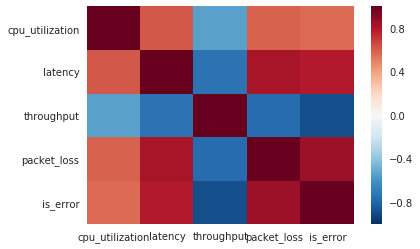

In [15]:
sns.heatmap(correlations)